In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from download import download
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [81]:
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip',
                '/tmp/aq', kind = 'zip')

Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.


In [82]:
df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv',
                 encoding='ISO-8859-1')

In [83]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [84]:
def convert_to_date(x):
    return datetime.strptime(x, '%Y %m %d %H')

df1 = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv',
                 parse_dates = [['year', 'month', 'day', 'hour']], date_parser = convert_to_date, keep_date_col = True)

In [87]:
df1 = df1.set_index('year_month_day_hour')

In [88]:
df1.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


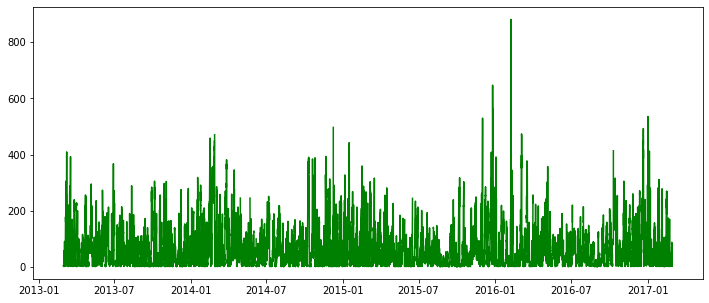

In [93]:
plt.figure(figsize = (12, 5))

plt.plot(df1['PM2.5'], color = 'green')

plt.show()

<br/>

## 1. Resampling
In **Time Series Analysis** often the data is in hourly or even in more small level. It is very difficult to understand this kind of data.  
In this situation resampleing comes up as a saviour. It generally aggregates the data and counts the mean.  
<br/>

Some resampling types are mentioned below:  

D - Calender Day  
B - Business Day  
W - Weekly   
M - Month    
Q - Quarter  
A - Year end  
H - Hour  
T - Minute  
S - Second  

<br/>

#### Quarterly Resampling

In [92]:
df1_Q = df1.resample('Q').mean()   # Q - Quarterly resampling

In [90]:
df1_Q.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year_month_day_hour,,,,,,,,,,,,
2013-03-31,372.5,95.705645,110.311231,24.358088,48.238364,1015.409859,68.141251,5.904032,1009.412903,-7.478763,0.031048,1.723790
2013-06-30,1836.5,70.772194,93.841561,12.967534,25.398703,851.055254,84.344643,19.396841,1000.553571,6.258929,0.055357,1.780907
2013-09-30,4032.5,55.591244,56.827395,4.812076,17.095171,768.922312,73.682063,24.921920,998.232473,17.548777,0.152717,1.307654
2013-12-31,6240.5,57.393170,74.730379,21.011999,41.490203,847.484554,35.867260,6.991667,1014.537274,-6.345788,0.001812,1.830299
2014-03-31,8424.5,98.661708,115.961132,31.446317,38.339516,1298.550725,44.158644,3.336991,1015.270602,-11.571389,0.002685,1.860185


**Note:**  
Before resampling, we have hourly data. But if we see the first few rows now, after resampling there are only 4 rows containing the data of a year. This means all the hourly level data get aggregated and splitted into 4 parts.
<br/>
<br/>

#### Let's see the difference between hourly and quarterly leveled data

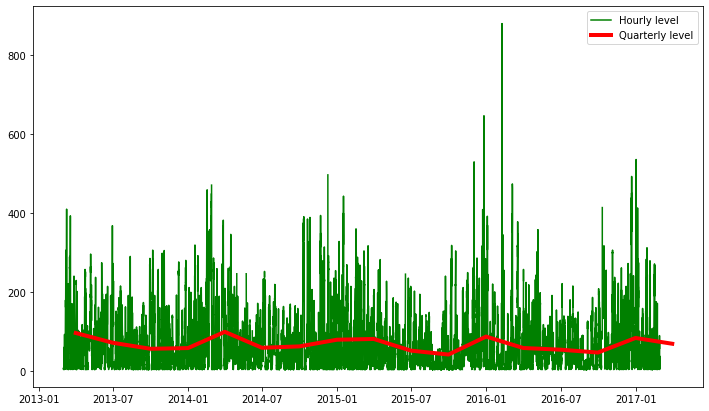

In [98]:
plt.figure(figsize = (12, 7))

plt.plot(df1['PM2.5'], color = 'green', label = 'Hourly level')
plt.plot(df1_Q['PM2.5'], color = 'red', linewidth = 4, label = 'Quarterly level')

plt.legend()
plt.show()

<br/>
<br/>

#### Monthly Resampling

In [100]:
df1_M = df1.resample('M').mean()

In [101]:
df1_M.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year_month_day_hour,,,,,,,,,,,,
2013-03-31,372.5,95.705645,110.311231,24.358088,48.238364,1015.409859,68.141251,5.904032,1009.412903,-7.478763,0.031048,1.723790
2013-04-30,1104.5,55.206506,80.148936,13.725471,26.967120,635.846726,73.853376,12.412222,1004.982083,-4.264028,0.015556,2.225139
2013-05-31,1836.5,71.402266,114.093220,17.413140,28.586733,766.922619,97.733500,21.985618,999.797177,6.492204,0.005376,1.862500
2013-06-30,2568.5,85.520950,87.280112,7.829724,20.992806,1145.575403,81.439421,23.706389,996.906667,16.540833,0.146806,1.252361
2013-07-31,3300.5,54.012676,56.859773,4.191483,15.649809,759.668666,81.595652,27.271640,992.801210,19.896237,0.229301,1.349328


No handles with labels found to put in legend.


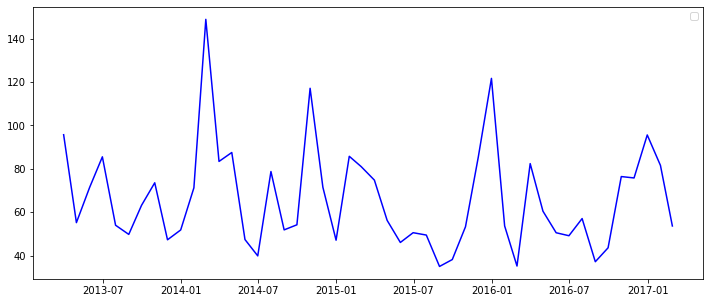

In [103]:
plt.figure(figsize = (12, 5))

plt.plot(df1_M['PM2.5'], color = 'blue')

plt.legend()
plt.show()

<br/>
<br/>

## 2. Diff : Difference
It can be used to see the difference.

In [106]:
df1['PM2.5'].diff()

year_month_day_hour
2013-03-01 00:00:00    NaN
2013-03-01 01:00:00    3.0
2013-03-01 02:00:00   -2.0
2013-03-01 03:00:00    1.0
2013-03-01 04:00:00   -1.0
                      ... 
2017-02-28 19:00:00    5.0
2017-02-28 20:00:00    2.0
2017-02-28 21:00:00   -4.0
2017-02-28 22:00:00    1.0
2017-02-28 23:00:00    3.0
Name: PM2.5, Length: 35064, dtype: float64

In [107]:
df1['PM2.5'].diff(3)

year_month_day_hour
2013-03-01 00:00:00    NaN
2013-03-01 01:00:00    NaN
2013-03-01 02:00:00    NaN
2013-03-01 03:00:00    2.0
2013-03-01 04:00:00   -2.0
                      ... 
2017-02-28 19:00:00   -3.0
2017-02-28 20:00:00   -2.0
2017-02-28 21:00:00    3.0
2017-02-28 22:00:00   -1.0
2017-02-28 23:00:00    0.0
Name: PM2.5, Length: 35064, dtype: float64

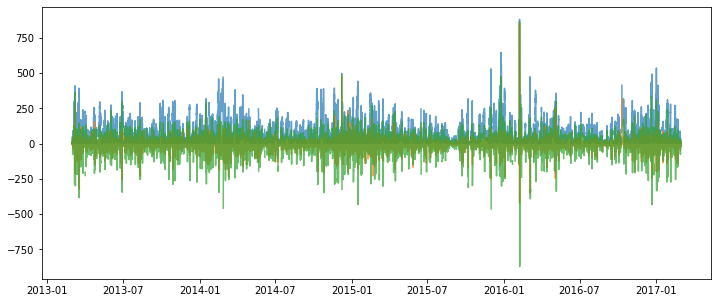

In [113]:
plt.figure(figsize = (12, 5))

df_diff = pd.concat([df1['PM2.5'], df1['PM2.5'].diff(), df1['PM2.5'].diff(10)], axis = 1)
plt.plot(df_diff, alpha = 0.7)

plt.show()

**Note:**  
This **Diff** function allows us to see a non-stationary data in a stationary form. Though it's not that stong stationary transformation.
<br/>

**When to use:**  
When we will have to calculate **t** and **t-n** period data.

<br/>
<br/>

## 3. Shift
The **Shift** function will shift a data according to the given position. By default, it's 1. So if we apply shift, it will take the data from 1-1-2000 and place it to 2-1-2000.

In [116]:
df1.shift(3).head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-01 03:00:00,1.0,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 04:00:00,2.0,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling


<br/>
<br/>

## tshift
**tshift** shifts the time where **shift** shifts the data.

In [117]:
df1.tshift(3)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 03:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 04:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 05:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 06:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 07:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 22:00:00,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
2017-02-28 23:00:00,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
2017-03-01 00:00:00,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling


**Note:**  
See the data started from 2013-03-01 00:00:00. But after applying **tshift**, it starts from 2013-03-01 03:00:00.

<br/>
<br/>
<br/>

## Let's see the difference between Shift and Tshift

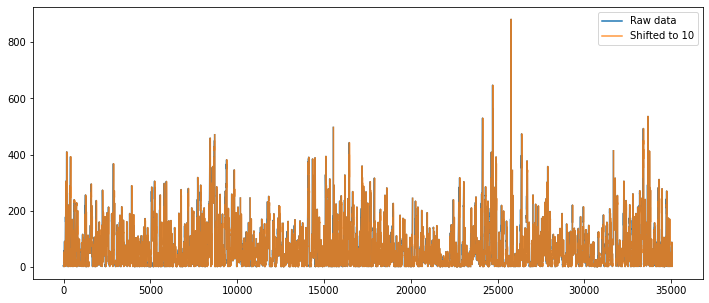

In [121]:
plt.figure(figsize = (12, 5))

plt.plot(df['PM2.5'], label = 'Raw data')
plt.plot(df['PM2.5'].shift(10), alpha = 0.8, label = 'Shifted to 10')

plt.legend()
plt.show()